In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import datetime as dt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupKFold
import seaborn as sns
import statistics
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import datetime as dt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
#importing MAC season 4 - days to floering trait file
flowering=pd.read_csv("/Users/ishitadebnath/Desktop/Genomics/MAC season 4/Phenotypes/Modified/mac_season_4_days_gdd_to_flowering.csv" , delimiter=",")
flowering=flowering.rename(columns={"genotype": "cultivar"})

In [3]:
#Creating a feature space and standardizing the features. 
dummies=pd.get_dummies(flowering.cultivar)
flowering=pd.concat([flowering, dummies], axis=1)
d=flowering.drop(columns=['cultivar','days_to_flowering',  'treatment', 'blocking_height',
       'scientificname','method_type', 'date_of_flowering', 'gdd_to_flowering', 'method','plot','range','column'])

X=d.to_numpy()
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

y = flowering[['days_to_flowering']]
y = np.asarray(y).flatten()

In [4]:
# Hyper parameter tuning

In [5]:
model = xgb.XGBRegressor()
groups=flowering.cultivar
n_estimators = range(50, 200, 15)
learning_rate = np.linspace(0,1,11)
max_depth = range(1, 20, 2)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
kfold = GroupKFold(n_splits=5)
grid_search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y, groups)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[23:16:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -10.918006 using {'learning_rate': 0.4, 'max_depth': 13, 'n_estimators': 110}
-69.098372 (1.508218) with: {'learning_rate': 0.0, 'max_depth': 1, 'n_estimators': 50}
-69.098372 (1.508218) with: {'learning_rate': 0.0, 'max_depth': 1, 'n_estimators': 65}
-69.098372 (1.508218) with: {'learning_rate': 0.0, 'max_depth': 1, 'n_estimators': 80}
-69.098372 (1.508218) with: {'learning_rate': 0.0, 'max_depth': 1, 'n_estimators': 95}
-69.098372 (1.508218) with: {'learning_rate': 0.0, 'max_depth': 1, 'n_estimators': 110}
-69.098372 (1.508218) with: {'learning_rate': 0.0, 'max_depth': 1, 'n_estimators': 125}
-69.098372 (1.508218) with: {'learning_rate': 0.0, 'max_depth': 1, 'n_estimators': 140}
-69.098372 (1.508218) with: {'learning_rate': 0.0, 'max_depth': 1, 'n_estimators': 155}
-69.098372 (1.508218) with: {'learning_rate': 0.0, 'max_depth': 1, 'n_estimators': 170}
-69.098372 (

Best: -10.948138 using {'max_depth': 1, 'n_estimators': 140}
-10.953047 (0.959364) with: {'max_depth': 1, 'n_estimators': 50}
-10.968245 (0.945156) with: {'max_depth': 1, 'n_estimators': 65}
-10.957249 (0.941530) with: {'max_depth': 1, 'n_estimators': 80}
-10.964150 (0.943200) with: {'max_depth': 1, 'n_estimators': 95}
-10.965912 (0.945773) with: {'max_depth': 1, 'n_estimators': 110}
-10.950069 (0.948921) with: {'max_depth': 1, 'n_estimators': 125}
-10.948138 (0.944965) with: {'max_depth': 1, 'n_estimators': 140}
-10.956772 (0.948919) with: {'max_depth': 1, 'n_estimators': 155}
-10.957165 (0.948802) with: {'max_depth': 1, 'n_estimators': 170}
-10.968670 (0.949920) with: {'max_depth': 1, 'n_estimators': 185}
-11.039367 (1.022641) with: {'max_depth': 3, 'n_estimators': 50}
-11.001462 (1.003730) with: {'max_depth': 3, 'n_estimators': 65}
-11.027208 (1.020514) with: {'max_depth': 3, 'n_estimators': 80}
-11.021162 (1.025845) with: {'max_depth': 3, 'n_estimators': 95}
-11.032366 (1.027526) w

Text(0, 0.5, 'RMSE')

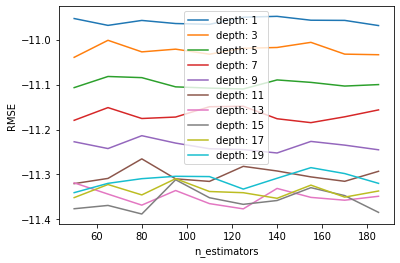

In [6]:
model = RandomForestRegressor()
max_depth = range(1, 20, 2)
n_estimators=range(50, 200, 15)
groups=flowering.cultivar
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = GroupKFold(n_splits=5)
grid_search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y, groups)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('RMSE')


In [7]:
model = SGDRegressor()
alpha = np.arange(0.01, 1.0, 0.05)

groups=flowering.cultivar
param_grid = dict(alpha=alpha)
kfold = GroupKFold(n_splits=5)
grid_search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y, groups)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: -10.936308 using {'alpha': 0.01}
-10.936308 (0.913578) with: {'alpha': 0.01}
-10.941673 (0.899528) with: {'alpha': 0.060000000000000005}
-10.940722 (0.902525) with: {'alpha': 0.11}
-10.943594 (0.902695) with: {'alpha': 0.16000000000000003}
-10.943664 (0.903447) with: {'alpha': 0.21000000000000002}
-10.942066 (0.903968) with: {'alpha': 0.26}
-10.941857 (0.903391) with: {'alpha': 0.31000000000000005}
-10.942995 (0.905623) with: {'alpha': 0.36000000000000004}
-10.940889 (0.904325) with: {'alpha': 0.41000000000000003}
-10.940812 (0.904477) with: {'alpha': 0.46}
-10.943154 (0.905505) with: {'alpha': 0.51}
-10.942427 (0.906581) with: {'alpha': 0.56}
-10.942035 (0.905092) with: {'alpha': 0.6100000000000001}
-10.945011 (0.906096) with: {'alpha': 0.66}
-10.944113 (0.907808) with: {'alpha': 0.7100000000000001}
-10.940909 (0.904820) with: {'alpha': 0.76}
-10.940193 (0.909769) with: {'alpha': 0.81}
-10.941536 (0.909427) with: {'alpha': 0.8600000000000001}
-10.944029 (0.906593) with: {'alpha'

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [8]:
model = LassoLars()
alpha = np.arange(0.1, 1.0, 0.01)

groups=flowering.cultivar
param_grid = dict(alpha=alpha)
kfold = GroupKFold(n_splits=5)
grid_search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y, groups)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -10.938264 using {'alpha': 0.20999999999999996}
-10.998629 (0.993926) with: {'alpha': 0.1}
-10.995427 (0.989638) with: {'alpha': 0.11}
-10.991944 (0.985304) with: {'alpha': 0.12}
-10.987995 (0.980684) with: {'alpha': 0.13}
-10.976145 (0.972425) with: {'alpha': 0.13999999999999999}
-10.965212 (0.961822) with: {'alpha': 0.14999999999999997}
-10.954295 (0.951354) with: {'alpha': 0.15999999999999998}
-10.944593 (0.941896) with: {'alpha': 0.16999999999999998}
-10.938596 (0.935663) with: {'alpha': 0.17999999999999997}
-10.938351 (0.932786) with: {'alpha': 0.18999999999999995}
-10.938418 (0.930084) with: {'alpha': 0.19999999999999996}
-10.938264 (0.927215) with: {'alpha': 0.20999999999999996}
-10.943642 (0.912219) with: {'alpha': 0.21999999999999995}
-10.944576 (0.908339) with: {'alpha': 0.22999999999999995}
-10.944989 (0.905417) with: {'alpha': 0.23999999999999994}
-10.942954 (0.905116) with: {'alpha': 0.24999999999999992}
-10.942954 (0.905116) with: {'alpha': 0.2599999999999999}
-10.9

In [9]:
model = Lasso()
alpha = np.arange(0.1, 1.0, 0.01)

groups=flowering.cultivar
param_grid = dict(alpha=alpha)
kfold = GroupKFold(n_splits=5)
grid_search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y, groups)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -10.942954 using {'alpha': 0.34999999999999987}
-10.973037 (0.977583) with: {'alpha': 0.1}
-10.969693 (0.969748) with: {'alpha': 0.11}
-10.967883 (0.961875) with: {'alpha': 0.12}
-10.964676 (0.954614) with: {'alpha': 0.13}
-10.960987 (0.949508) with: {'alpha': 0.13999999999999999}
-10.960458 (0.946272) with: {'alpha': 0.14999999999999997}
-10.959100 (0.943444) with: {'alpha': 0.15999999999999998}
-10.956290 (0.940516) with: {'alpha': 0.16999999999999998}
-10.952727 (0.938927) with: {'alpha': 0.17999999999999997}
-10.954079 (0.939836) with: {'alpha': 0.18999999999999995}
-10.951905 (0.938773) with: {'alpha': 0.19999999999999996}
-10.950536 (0.936441) with: {'alpha': 0.20999999999999996}
-10.949158 (0.934076) with: {'alpha': 0.21999999999999995}
-10.948061 (0.931298) with: {'alpha': 0.22999999999999995}
-10.945626 (0.928726) with: {'alpha': 0.23999999999999994}
-10.943747 (0.926118) with: {'alpha': 0.24999999999999992}
-10.943827 (0.923925) with: {'alpha': 0.2599999999999999}
-10.9

In [10]:
model = Ridge()
alpha = np.arange(0.1, 1.0, 0.01)

groups=flowering.cultivar
param_grid = dict(alpha=alpha)
kfold = GroupKFold(n_splits=5)
grid_search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y, groups)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -10.945881 using {'alpha': 0.9899999999999995}
-10.959893 (0.852936) with: {'alpha': 0.1}
-10.959520 (0.853304) with: {'alpha': 0.11}
-10.959156 (0.853668) with: {'alpha': 0.12}
-10.958803 (0.854026) with: {'alpha': 0.13}
-10.958459 (0.854380) with: {'alpha': 0.13999999999999999}
-10.958124 (0.854729) with: {'alpha': 0.14999999999999997}
-10.957798 (0.855074) with: {'alpha': 0.15999999999999998}
-10.957480 (0.855414) with: {'alpha': 0.16999999999999998}
-10.957171 (0.855749) with: {'alpha': 0.17999999999999997}
-10.956869 (0.856080) with: {'alpha': 0.18999999999999995}
-10.956575 (0.856407) with: {'alpha': 0.19999999999999996}
-10.956289 (0.856729) with: {'alpha': 0.20999999999999996}
-10.956010 (0.857048) with: {'alpha': 0.21999999999999995}
-10.955738 (0.857362) with: {'alpha': 0.22999999999999995}
-10.955473 (0.857673) with: {'alpha': 0.23999999999999994}
-10.955214 (0.857979) with: {'alpha': 0.24999999999999992}
-10.954962 (0.858282) with: {'alpha': 0.2599999999999999}
-10.95

In [11]:
model = ElasticNet()
alpha = np.arange(0.01, 1.0, 0.05)
l1_ratio=np.arange(0, 1, 0.01)
groups=flowering.cultivar
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
kfold = GroupKFold(n_splits=5)
grid_search = GridSearchCV(model, param_grid, scoring="neg_root_mean_squared_error", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y, groups)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -10.933770 using {'alpha': 0.01, 'l1_ratio': 0.92}
-10.944629 (0.876588) with: {'alpha': 0.01, 'l1_ratio': 0.0}
-10.944629 (0.876530) with: {'alpha': 0.01, 'l1_ratio': 0.01}
-10.944620 (0.876472) with: {'alpha': 0.01, 'l1_ratio': 0.02}
-10.944623 (0.876413) with: {'alpha': 0.01, 'l1_ratio': 0.03}
-10.944603 (0.876361) with: {'alpha': 0.01, 'l1_ratio': 0.04}
-10.944584 (0.876296) with: {'alpha': 0.01, 'l1_ratio': 0.05}
-10.944574 (0.876234) with: {'alpha': 0.01, 'l1_ratio': 0.06}
-10.944562 (0.876172) with: {'alpha': 0.01, 'l1_ratio': 0.07}
-10.944551 (0.876110) with: {'alpha': 0.01, 'l1_ratio': 0.08}
-10.944538 (0.876049) with: {'alpha': 0.01, 'l1_ratio': 0.09}
-10.944539 (0.875984) with: {'alpha': 0.01, 'l1_ratio': 0.1}
-10.944512 (0.875925) with: {'alpha': 0.01, 'l1_ratio': 0.11}
-10.944495 (0.875868) with: {'alpha': 0.01, 'l1_ratio': 0.12}
-10.944473 (0.875821) with: {'alpha': 0.01, 'l1_ratio': 0.13}
-10.944450 (0.875775) with: {'alpha': 0.01, 'l1_ratio': 0.14}
-10.944425 (0.8

In [12]:
#Implementation of different algorithms

# 5 fold cross-validation for Random Forest
groups=flowering.cultivar
ns=5
cv = GroupKFold(n_splits=ns)
error=0
R2=0
e=[]
for train_index, test_index in cv.split(X, y,groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('TRAIN :',X_train.shape, 'TEST :', X_test.shape)
    crf=RandomForestRegressor(max_depth=1, n_estimators=65).fit(X_train, y_train)

    pred=crf.predict(X_test)
    error=error+math.sqrt(np.sum((pred-y_test)**2)/y_test.shape[0])
    R2=R2+r2_score(y_test, pred)
    e.append(math.sqrt(mean_squared_error(y_test, pred)))
    error=error+math.sqrt(mean_squared_error(y_test, pred))

std= (statistics.stdev(e))
print('R^2 for 5-fold CV RF:', R2/ns)
print('Root Mean square error for 5-fold CV RF',error/ns,'+-', std)

# 5 fold cross-validation for Stochastic Gradient Descent Regression

cv =GroupKFold(n_splits=ns)
error=0
R2=0
e=[]
for train_index, test_index in cv.split(X,y,groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clm=SGDRegressor(alpha=0.96).fit(X_train, y_train)
    pred=clm.predict(X_test)
    error=error+math.sqrt(mean_squared_error(y_test, pred))
    e.append(math.sqrt(mean_squared_error(y_test, pred)))
    R2=R2+r2_score(y_test, pred)
    
std= (statistics.stdev(e))

print('R^2 for 5-fold CV SG:', R2/ns)
print('Root Mean square error for 5-fold CV SG:',error/ns, '+-', std)

# 5 fold cross-validation for Linear Regression
cv =GroupKFold(n_splits=ns)
error=0
R2=0
e=[]
for train_index, test_index in cv.split(X,y,groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clm=LinearRegression().fit(X_train, y_train)
    pred=clm.predict(X_test)
    error=error+math.sqrt(mean_squared_error(y_test, pred))
    e.append(math.sqrt(mean_squared_error(y_test, pred)))
    R2=R2+r2_score(y_test, pred)
    
std= (statistics.stdev(e))

print('R^2 for 5-fold CV LR:', R2/ns)
print('Root Mean square error for 5-fold CV LR:',error/ns, '+-', std)

# 5 fold cross-validation for XgBoost Regression
cv =GroupKFold(n_splits=ns)
error=0
R2=0
e=[]
for train_index, test_index in cv.split(X,y,groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clm=xgb.XGBRegressor(learning_rate= 0.4, max_depth= 13, n_estimators= 110).fit(X_train, y_train)
    pred=clm.predict(X_test)
    error=error+math.sqrt(mean_squared_error(y_test, pred))
    e.append(math.sqrt(mean_squared_error(y_test, pred)))
    R2=R2+r2_score(y_test, pred)
    
std= (statistics.stdev(e))

print('R^2 for 5-fold CV XG:', R2/ns)
print('Root Mean square error for 5-fold CV XG:',error/ns, '+-', std)

# 5 fold cross-validation for LassoLars Regression
cv =GroupKFold(n_splits=ns)
error=0
R2=0
e=[]
for train_index, test_index in cv.split(X,y,groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clm=LassoLars().fit(X_train, y_train)
    pred=clm.predict(X_test)
    error=error+math.sqrt(mean_squared_error(y_test, pred))
    e.append(math.sqrt(mean_squared_error(y_test, pred)))
    R2=R2+r2_score(y_test, pred)
    
std= (statistics.stdev(e))

print('R^2 for 5-fold CV LL:', R2/ns)
print('Root Mean square error for 5-fold CV LL:',error/ns, '+-', std)

# 5 fold cross-validation for Lasso Regression
cv =GroupKFold(n_splits=ns)
error=0
R2=0
e=[]
for train_index, test_index in cv.split(X,y,groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clm=Lasso(alpha=0.35).fit(X_train, y_train)
    pred=clm.predict(X_test)
    error=error+math.sqrt(mean_squared_error(y_test, pred))
    e.append(math.sqrt(mean_squared_error(y_test, pred)))
    R2=R2+r2_score(y_test, pred)
    
std= (statistics.stdev(e))

print('R^2 for 5-fold CV L:', R2/ns)
print('Root Mean square error for 5-fold CV L:',error/ns, '+-', std)

# 5 fold cross-validation for Ridge Regression
cv =GroupKFold(n_splits=ns)
error=0
R2=0
e=[]
for train_index, test_index in cv.split(X,y,groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clm=Ridge(alpha=0.99).fit(X_train, y_train)
    pred=clm.predict(X_test)
    error=error+math.sqrt(mean_squared_error(y_test, pred))
    e.append(math.sqrt(mean_squared_error(y_test, pred)))
    R2=R2+r2_score(y_test, pred)
    
std= (statistics.stdev(e))

print('R^2 for 5-fold CV R:', R2/ns)
print('Root Mean square error for 5-fold CV R:',error/ns, '+-', std)

# 5 fold cross-validation for ElasticNet Regression
cv =GroupKFold(n_splits=ns)
error=0
R2=0
e=[]
for train_index, test_index in cv.split(X,y,groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clm=ElasticNet(alpha= 0.01, l1_ratio= 0.87, max_iter=200).fit(X_train, y_train)
    pred=clm.predict(X_test)
    error=error+math.sqrt(mean_squared_error(y_test, pred))
    e.append(math.sqrt(mean_squared_error(y_test, pred)))
    R2=R2+r2_score(y_test, pred)
    
std= (statistics.stdev(e))

print('R^2 for 5-fold CV EN:', R2/ns)
print('Root Mean square error for 5-fold CV EN:',error/ns, '+-', std)



TRAIN : (124, 83) TEST : (32, 83)
TRAIN : (125, 83) TEST : (31, 83)
TRAIN : (125, 83) TEST : (31, 83)
TRAIN : (125, 83) TEST : (31, 83)
TRAIN : (125, 83) TEST : (31, 83)
R^2 for 5-fold CV RF: -0.03344421834004394
Root Mean square error for 5-fold CV RF 21.932504700322117 +- 1.0444006090836129
R^2 for 5-fold CV SG: -0.029290675962177916
Root Mean square error for 5-fold CV SG: 10.942453386318883 +- 1.0118263602914168
R^2 for 5-fold CV LR: -1.9356809523526745e+29
Root Mean square error for 5-fold CV LR: 4430085365828724.0 +- 1070738257726089.9
[23:17:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:17:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:17:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:17:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:sq